In [12]:
# 라지 마진 분류
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, (2, 3)]
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
svm_clf.coef_

array([[1.29411744, 0.82352928]])

In [14]:
svm_clf.intercept_

array([-3.78823471])

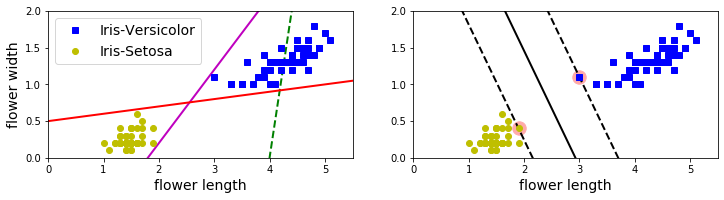

In [10]:
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # 결정 경계에서 w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
plt.figure(figsize=(12, 2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")

plt.xlabel("flower length", fontsize=14)
plt.ylabel("flower width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")

plt.xlabel("flower length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

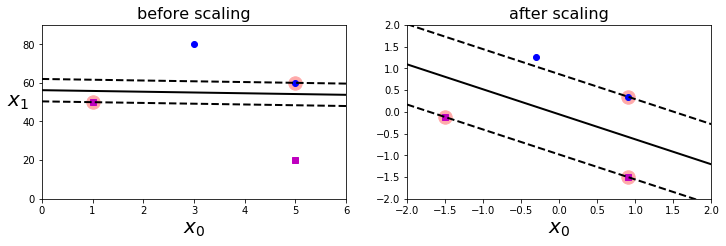

In [15]:
# 특성의 스케일에 민감함
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel='linear', C=100) # 하이퍼파라미터 C
# C가 클수록 마진은 좁아지지만 마진 오류는 적어짐
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")

plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20, rotation=0)

plt.title('before scaling', fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)

plt.xlabel('$x_0$', fontsize=20)
plt.title('after scaling', fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

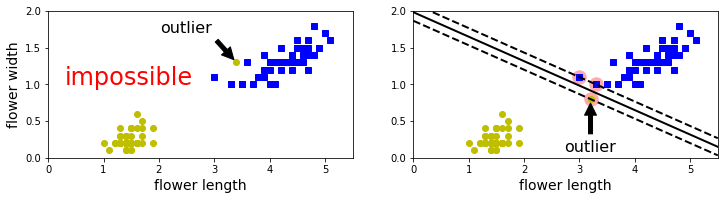

In [16]:
# 이상치에 민감함
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel='linear', C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12, 2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")

plt.text(0.3, 1.0, "impossible", fontsize=24, color="red")
plt.xlabel("flower length", fontsize=14)
plt.ylabel("flower width", fontsize=14)

plt.annotate("outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("flower length", fontsize=14)
plt.annotate("outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

In [17]:
# 라지 마진 vs 마진 오류
# 붓꽃 데이터셋 적재, 특성 스케일 변경, 선형 SVM 모델
# LinearSVM -> 힌지 손실 함수 적용
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris.data[:, (2, 3)] # petal length, petal Width
y = (iris.target == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [18]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [20]:
# 여러가지 규제 설정 비교 그래프
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [21]:
# 스케일되지 않은 파라미터
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기(마진 결계 선에 영향을 주는 벡터)
# LinearSVC에는 서포트 벡터가 없음
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()

svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

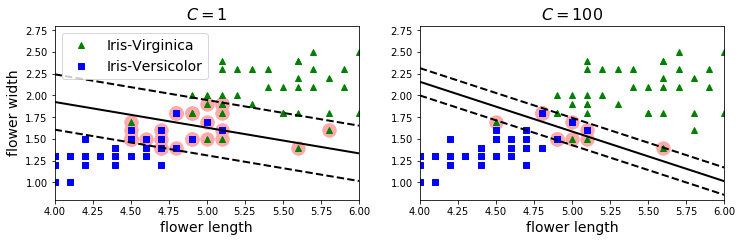

In [25]:
plt.figure(figsize=(12, 3.2))
plt.subplot(121)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")

plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("flower length", fontsize=14)
plt.ylabel("flower width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C={}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")

plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("flower length", fontsize=14)
plt.title("$C={}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

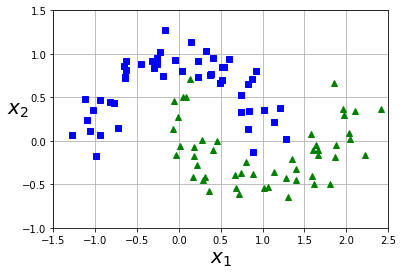

In [26]:
# 비선형 분류
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which="both")
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [27]:
# 다항 특성 추가
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000, random_state=42))
])
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=2000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

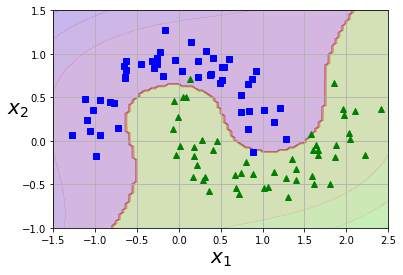

In [29]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) # meshgrid: 좌표 벡터 -> 좌표 행렬
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [36]:
# 다항식 커널(커널 트릭)
# 특성을 실제로 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [37]:
poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

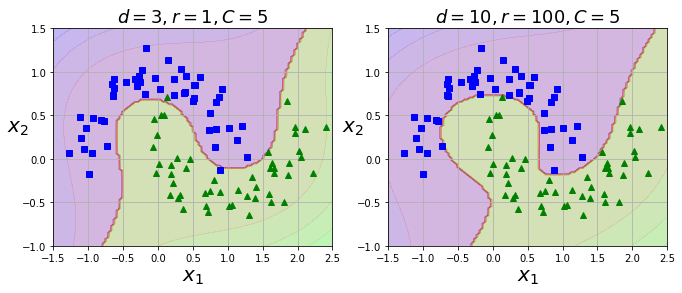

In [38]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

Text(0.5, 1.0, '$d=3, r=80, C=1000$')

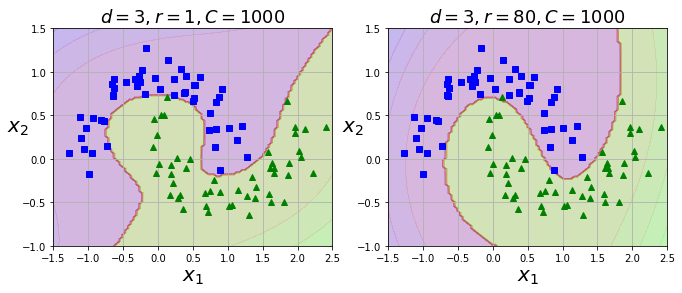

In [70]:
# 적절한 하이퍼파라미터 확인해보기
poly_kernel_svm_clf1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=1000))
])
poly_kernel_svm_clf1.fit(X, y)

poly_kernel_svm_clf2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=80, C=1000))
])
poly_kernel_svm_clf2.fit(X, y)



plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=1000$", fontsize=18)

plt.subplot(122)
plot_predictions(poly_kernel_svm_clf2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=80, C=1000$", fontsize=18)

In [99]:
# 테스트셋 나누기
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [101]:
# 모델 평가 점수
class ScoreKeeper(object):
    """only holds scores, doesn't create them"""
    def __init__(self):
        self.precision = "N/A"
        self.accuracy = "N/A"
        self.recall = "N/A"
        return

    def __sub__(self, other):
        """calculates the difference between the three scores

        Args:
         other (Scores): the right-hand side of the subtraction

        Returns:
         ScoreKeeper: object with the differences

        Raises:
         TypeError: one of the values wasn't set on one of the Scores
        """
        scores = ScoreKeeper()
        scores.accuracy = self.accuracy - other.accuracy
        scores.precision = self.precision - other.precision
        scores.recall = self.recall - other.recall
        return scores

    def __gt__(self, other):
        """compares scores

        Args:
         other (Scores): object to compare to

        Returns:
         bool: True if all three scores are greater than other's

        Raises:
         TypeError: one of the values wasn't set
        """
        return all((self.accuracy > other.accuracy,
                    self.precision > other.precision,
                    self.recall > other.recall))

    def __str__(self):
        return "Precision: {0:.2f}, Accuracy: {1:.2f}, Recall: {2:.2f}".format(
            self.precision,
            self.accuracy,
            self.recall)
    
class Scores(ScoreKeeper):
    def __init__(self, model, x_test, y_test):
        """  model: model that has been fit to the data
             x_test: input for accuracy measurement
             y_test: labels for scoring the model
        """
        self.x_test = x_test
        self.y_test = y_test
        self._accuracy = None
        self._recall = None
        self._precision = None
        self.model = model
        self._predictions = None
        self._scores = None
        return

    @property
    def predictions(self):
        """the model's predictions

        Returns:
         array: predictions for x-test
        """
        if self._predictions is None:
            self._predictions = self.model.predict(self.x_test)
        return self._predictions

    @property
    def accuracy(self):
        """the accuracy of the model's predictions

        the fraction that was correctly predicted

        (tp + tn)/(tp + tn + fp + fn)

        Returns:
         float: accuracy of predictions for x-test
        """
        if self._accuracy is None:
            self._accuracy = self.model.score(self.x_test, self.y_test)
        return self._accuracy

    @property
    def recall(self):
        """the recall score for the predictions

        The fraction of true-positives penalized for missing any
        This is the better metric when missing a case is more costly
        than accidentally identifying a case.

        tp / (tp + fn)

        Returns:
         float: recall of the predictions
        """
        if self._recall is None:
            self._recall = recall_score(self.y_test, self.predictions)
        return self._recall

    @property
    def precision(self):
        """the precision of the test predictions

        The fraction of true-positives penalized for false-positives
        This is the better metric when accidentally identifying a case
        is more costly than missing a case

        tp / (tp + fp)

        Returns:
         float: precision score
        """
        if self._precision is None:
            self._precision = precision_score(self.y_test, self.predictions)
        return self._precision

In [102]:
# 그리드 탐색
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# 각 커널에 해당되는 파라미터 범위
lin_c_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

rbf_c_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
rbf_g_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

poly_c_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
poly_g_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
poly_cf_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [
    {'kernel': ['linear'], 'C': lin_c_range}, # linear 커널
    {'kernel': ['rbf'], 'C': rbf_c_range, 'gamma': rbf_g_range}, # rbf 커널
    {'kernel': ['poly'], 'C': poly_c_range, 'gamma': poly_g_range, 'coef0': poly_cf_range},
]

# grid_search = GridSearchCV(pipe, param_grid)
# 표준화 파이프라인으로 만든 svc 모델
pipe_svc = Pipeline([('scl', StandardScaler()), 
                     ('clf', SVC(random_state=1))])

# scoring: Classification일 경우, 'accuracy', 'f1', ...
# scoring: Regression일 경우, 'neg_mean_squared_error', 'r2', ...
scoring = {'accuracy': make_scorer(accuracy_score), 'prec': 'precision'}
grid_search = GridSearchCV(estimator=pipe_svc,    # 모델
                           param_grid=param_grid, # 찾고자하는 파라미터(dict 형식)
                           scoring=scoring, 
                           cv=10,                 # cv = KFold: 교차검증 횟수
                           n_jobs=4)              # n_jonbs: 병렬처리 개수

grid_search.fit(X_train, y_train)

NameError: name 'make_scorer' is not defined

In [81]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.95
{'classifier': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 'classifier__C': 1, 'classifier__gamma': 1, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [85]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)
print(df)
# print(df.sort_values(by='param_max_features'))
# print(df.sort_values(by='param_max_features', ascending=0))
print(df.sort_values(by='rank_test_score'))

score = grid_search.score(X_test, y_test)
print(score)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.001798  4.006625e-04         0.001000        0.000633   
1        0.001799  4.000252e-04         0.000599        0.000489   
2        0.001400  4.890892e-04         0.000399        0.000489   
3        0.001198  3.963709e-04         0.000600        0.000490   
4        0.001599  4.894537e-04         0.000200        0.000400   
5        0.000999  6.320327e-04         0.000615        0.000503   
6        0.003125  6.250381e-03         0.000000        0.000000   
7        0.000000  0.000000e+00         0.000000        0.000000   
8        0.003125  6.250095e-03         0.000000        0.000000   
9        0.000999  6.321081e-04         0.000200        0.000400   
10       0.000625  5.121478e-04         0.000400        0.000490   
11       0.000000  0.000000e+00         0.000000        0.000000   
12       0.003125  6.250286e-03         0.000000        0.000000   
13       0.003125  6.249619e-03         0.000000

In [87]:
grid_search.best_params_

{'classifier': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
     probability=False, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 'classifier__C': 1,
 'classifier__gamma': 1,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [88]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('preprocessing',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [92]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

nan {'classifier': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}
nan {'classifier': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 'classifier__C': 0.001, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}
nan {'classifier': SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinkin

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [94]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__gamma,param_preprocessing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001798,4.006625e-04,0.001000,0.000633,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.001,0.001,"StandardScaler(copy=True, with_mean=True, with...","{'classifier': SVC(C=1, break_ties=False, cach...",0.5625,0.5625,0.5625,0.5000,0.5000,0.5375,0.030619,20
1,0.001799,4.000252e-04,0.000599,0.000489,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.001,0.01,"StandardScaler(copy=True, with_mean=True, with...","{'classifier': SVC(C=1, break_ties=False, cach...",0.5625,0.5625,0.5625,0.5000,0.5000,0.5375,0.030619,20
2,0.001400,4.890892e-04,0.000399,0.000489,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.001,0.1,"StandardScaler(copy=True, with_mean=True, with...","{'classifier': SVC(C=1, break_ties=False, cach...",0.5625,0.5625,0.5625,0.5000,0.5000,0.5375,0.030619,20
3,0.001198,3.963709e-04,0.000600,0.000490,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.001,1,"StandardScaler(copy=True, with_mean=True, with...","{'classifier': SVC(C=1, break_ties=False, cach...",0.5625,0.5625,0.5625,0.5000,0.5000,0.5375,0.030619,20
4,0.001599,4.894537e-04,0.000200,0.000400,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.001,10,"StandardScaler(copy=True, with_mean=True, with...","{'classifier': SVC(C=1, break_ties=False, cach...",0.5625,0.5625,0.5625,0.5000,0.5000,0.5375,0.030619,20
5,0.000999,6.320327e-04,0.000615,0.000503,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.001,100,"StandardScaler(copy=True, with_mean=True, with...","{'classifier': SVC(C=1, break_ties=False, cach...",0.5625,0.5625,0.5625,0.5000,0.5000,0.5375,0.030619,20
6,0.003125,6.250381e-03,0.000000,0.000000,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.01,0.001,"StandardScaler(copy=True, with_mean=True, with...","{'classifier': SVC(C=1, break_ties=False, cach...",0.5625,0.5625,0.5625,0.5000,0.5000,0.5375,0.030619,20
7,0.000000,0.000000e+00,0.000000,0.000000,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.01,0.01,"StandardScaler(copy=True, with_mean=True, with...","{'classifier': SVC(C=1, break_ties=False, cach...",0.5625,0.5625,0.5625,0.5000,0.5000,0.5375,0.030619,20
8,0.003125,6.250095e-03,0.000000,0.000000,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.01,0.1,"StandardScaler(copy=True, with_mean=True, with...","{'classifier': SVC(C=1, break_ties=False, cach...",0.5625,0.5625,0.5625,0.5000,0.5000,0.5375,0.030619,20
9,0.000999,6.321081e-04,0.000200,0.000400,"SVC(C=1, break_ties=False, cache_size=200, cla...",0.01,1,"StandardScaler(copy=True, with_mean=True, with...","{'classifier': SVC(C=1, break_ties=False, cach...",0.5625,0.5625,0.5625,0.5000,0.5000,0.5375,0.030619,20
